In [2]:
import pyvisa as visa
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
import os
import sys

<Figure size 432x432 with 0 Axes>

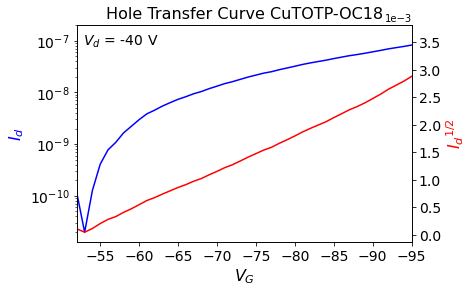

In [39]:
material = "MOF"
curve= "IdVg_MOF_1_B3_Vdm40"
Title = 'Hole Transfer Curve CuTOTP-OC18'
plt.figure(figsize=(6,6))
for filename in os.listdir(os.getcwd() + '/data'):
    if material in filename:
        if curve in filename:
            fig,ax = plt.subplots()
            result = np.loadtxt(os.getcwd()+ '/data/' + filename)
            xval = result[0]-10
            yval = np.absolute(result[1])
            yval1 = np.sqrt(yval)*10
            ax.plot(xval,yval, color = 'b')
            ax.set_xlabel('$V_G$', fontsize = 16)
            ax.set_ylabel('$I_d$', color = 'b', fontsize = 16)
            plt.yscale('log')
            
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            
            ax2 = ax.twinx()
            ax2.plot(xval,yval1, color = 'r')
            ax2.set_ylabel('${I_d}^{1/2}$', color = 'r',fontsize = 16)
            plt.ticklabel_format(axis = 'y',style="sci", scilimits=(0,0))
            
            #plt.title(filename)
            plt.title('Hole Transfer Curve CuTOTP-OC18', fontsize =16)
            plt.xlim(-52,-95)
            
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
        
        
            plt.figtext(0.14,0.81,"$V_d$ = -40 V", fontsize=14)
            plt.savefig(os.getcwd() +'/figures/' + Title, dpi=600,bbox_inches='tight')

<Figure size 432x432 with 0 Axes>

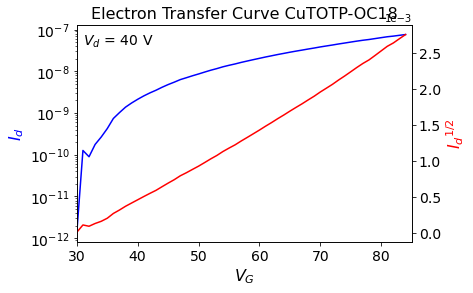

In [38]:
material = "MOF"
curve= "IdVgE_MOF_1_B3_Vd40"
Title = 'Electron Transfer Curve CuTOTP-OC18'
plt.figure(figsize=(6,6))
for filename in os.listdir(os.getcwd() + '/data'):
    if material in filename:
        if curve in filename:
            fig,ax = plt.subplots()
            result = np.loadtxt(os.getcwd()+ '/data/' + filename)
            xval = result[0]-10
            yval = np.absolute(result[1])
            yval1 = np.sqrt(yval)*10
            ax.plot(xval,yval, color = 'b')
            ax.set_xlabel('$V_G$', fontsize = 16)
            ax.set_ylabel('$I_d$', color = 'b', fontsize = 16)
            plt.yscale('log')
            
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            
            ax2 = ax.twinx()
            ax2.plot(xval,yval1, color = 'r')
            ax2.set_ylabel('${I_d}^{1/2}$', color = 'r',fontsize = 16)
            plt.ticklabel_format(axis = 'y',style="sci", scilimits=(0,0))
            
            #plt.title(filename)
            plt.title('Electron Transfer Curve CuTOTP-OC18', fontsize =16)
            plt.xlim(30,85)
            
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
        
        
            plt.figtext(0.14,0.81,"$V_d$ = 40 V", fontsize=14)
            plt.savefig(os.getcwd() +'/figures/' + Title, dpi=600,bbox_inches='tight')
            

In [18]:
def plotter(filename, bot = 0 , top = 0, label = 'none'):
    result = np.loadtxt(os.getcwd()+ '/data/' + filename)
    xval = result[0]
    yval = result[1]
    if bot == 0 and top == 0:
        plt.plot(xval,yval)
    else:
        mini = np.where(xval == bot)[0][0]
        maxi = np.where(xval == top)[0][0]
        if mini < maxi:
            xvalues = xval[mini:maxi]
            yvalues = yval[mini:maxi]
        else:
            xvalues = xval[maxi:mini]
            yvalues = yval[maxi:mini]
            
        f = scipy.interpolate.interp1d(xval, yval, kind = 'nearest')
        xnew = np.linspace(min(xvalues), max(xvalues), num=20, endpoint=True)
        ynew = f(xnew)
            
        plt.plot(xnew,ynew, label = label)

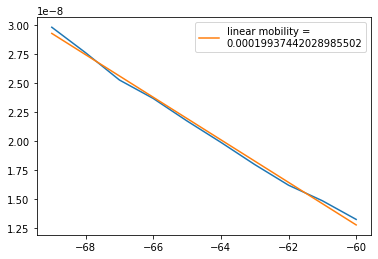

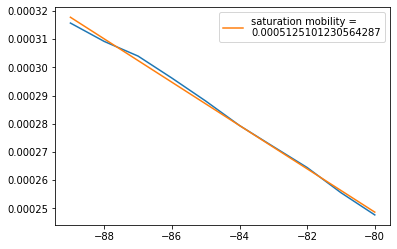

In [28]:
# use the above file names and plots to select a curve, and change start and stop positions to calculate linear mobility
filename = 'IdVg_MOF_1_B3_Vdm40.txt'
result = np.loadtxt(os.getcwd()+ '/data/' + filename)
xval = result[0]
yval = result[1]

#input here parameters to calculate the mobility
L = 50        #50 micron channel length
W = 1000      #1000 micron channel width
Ci = 11.5e-9    #10 nF/cm^2 equation: permitivity of dielectric(sio2)*oxide layer thickness in cm (300nm)
Vd = 40     # Volt drain voltage

#input here the start and stop position of the region of interest for linear mobility
startpos = -60
stoppos = -70
mini = np.where(xval == startpos)[0][0]
maxi = np.where(xval == stoppos)[0][0]
if mini < maxi:
    xvalues = xval[mini:maxi]
    yvalues = yval[mini:maxi]
else:
    xvalues = xval[maxi:mini]
    yvalues = yval[maxi:mini]
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)
yregress = slope*xvalues+intercept
mu_lin = (abs(slope)*L)/(W*Vd*Ci)
plt.figure()
plt.plot(xvalues,yvalues)
plt.plot(xvalues,yregress, label = "linear mobility = \n" + str(mu_lin) )
plt.legend()

#input here the start and stop position of the region of interest for saturation mobility
startpos = -80
stoppos = -90
mini = np.where(xval == startpos)[0][0]
maxi = np.where(xval == stoppos)[0][0]
if mini < maxi:
    xvalues = xval[mini:maxi]
    yvalues = np.sqrt(abs(yval[mini:maxi]))
else:
    xvalues = xval[maxi:mini]
    yvalues = np.sqrt(abs(yval[maxi:mini]))
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)
mu_sat = (2*L)/(W*Ci)*(slope)**2
yregress = slope*xvalues+intercept
plt.figure()
plt.plot(xvalues,yvalues)
plt.plot(xvalues,yregress, label = "saturation mobility = \n" + str(mu_sat))
plt.legend()